In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df = pd.read_csv("dados2.csv", sep=";")

# df['state'] = df['sample_name'].str[:2]
# df['time'] = df['sample_name'].str.extract(r'(\w{3}-\d{4})')

#df = df[df['time'].str.contains("SET-2024", case=False, na=False)]
df = df[df['time'].str.contains("SET")]
#df = df[df['protocol'].str.contains("UPIP")]

In [ ]:
df = df.pivot_table(index="name", 
                        columns="drug_class", 
                        aggfunc="size", 
                        fill_value=0)

#print(df.columns)


df = df[df.index.str.endswith('UPIP')]

#df

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

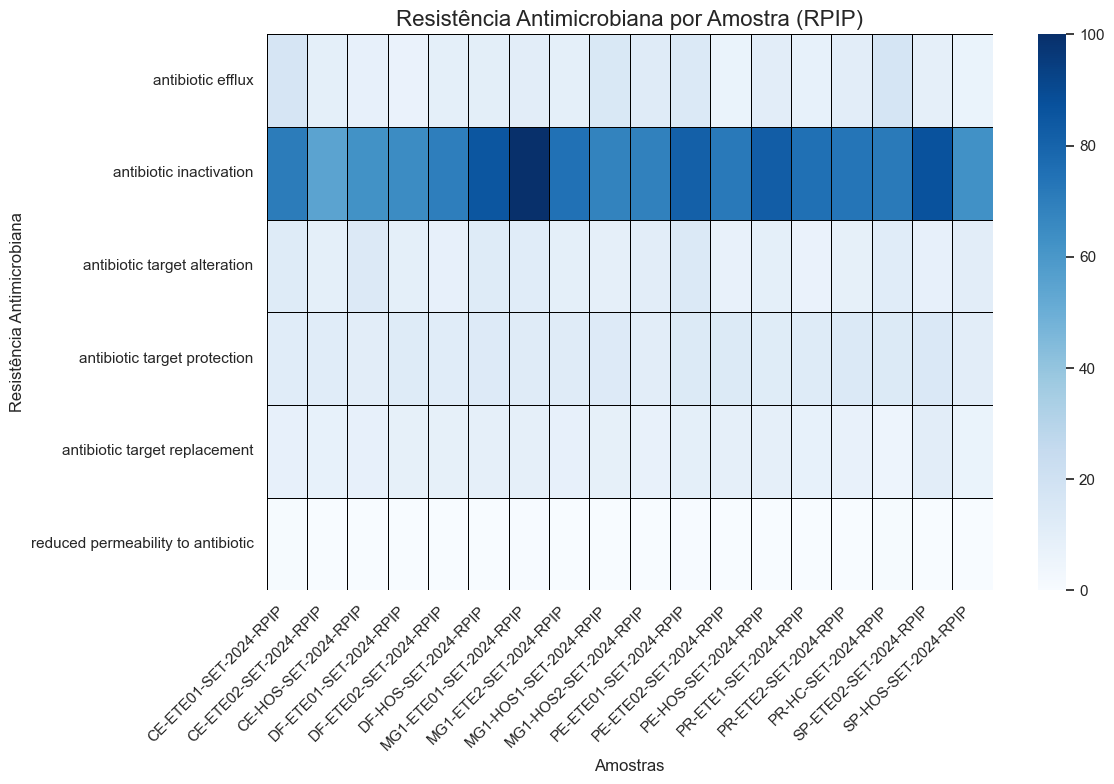

In [ ]:
df_reset = df.reset_index()

# Calcular a porcentagem de cada valor em relação ao valor máximo
df_percent = df_reset.set_index('name').T / df_reset.set_index('name').T.max().max() * 100

# Agora podemos proceder com o gráfico
plt.figure(figsize=(12, 8))  # Aumentando o tamanho da figura
sns.set(style="whitegrid")

# Gerar o heatmap com os valores em porcentagem, esquema de cores "BuGn" e contorno preto nas células
ax = sns.heatmap(df_percent, cmap="Greens", annot=False, cbar=True, linewidths=0.5, linecolor='black')

# Ajustar rótulos para legibilidade
ax.set_title("Classes de Antibióticos por Amostra (UPIP)", fontsize=16)
plt.xlabel("Amostras", fontsize=12)
plt.ylabel("Classes de Antibióticos", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 

plt.tight_layout()

plt.savefig("heatmap_classes_antibioticos_upip.jpg", format="jpg", dpi=300)

plt.show()
